# Data Preprocessing

In [1]:
from ipynb.fs.full.DSC680_CPJP_Data_Preprocessing import *



********* November 2000 data**************** 




,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2000-11-01,00046855,D,E,110411,4710085120468,3,51,57
2,2000-11-01,00539166,E,E,130315,4714981010038,2,56,48
3,2000-11-01,00663373,F,E,110217,4710265847666,1,180,135




********* December 2000 data**************** 




,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2000-12-01,00207423,C,E,530101,4710054134403,1,92,99
2,2000-12-01,00329002,F,E,590514,4710049000973,1,41,49
3,2000-12-01,01657951,E,E,120103,4710011401135,1,23,29




********* January 2021 data**************** 




,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2001-01-01,00141833,F,F,130207,4710105011011,2,44,52
2,2001-01-01,01376753,E,E,110217,4710265849066,1,150,129
3,2001-01-01,01603071,E,G,100201,4712019100607,1,35,39




********* Feb 2021 data**************** 




,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2001-02-01,00557818,H,E,500210,4710114105046,1,123,135
2,2001-02-01,01677683,C,B,711310,4902520163103,6,840,894
3,2001-02-01,01900910,A,D,500206,4710036003598,1,26,33


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817741 entries, 0 to 817740
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_dt    817741 non-null  datetime64[ns]
 1   customer_id       817741 non-null  object        
 2   age_group         817741 non-null  object        
 3   pin_code          817741 non-null  object        
 4   product_subclass  817741 non-null  object        
 5   product_id        817741 non-null  object        
 6   amount            817741 non-null  object        
 7   asset             817741 non-null  object        
 8   sales_price       817741 non-null  object        
 9   age_label         817741 non-null  object        
 10  age_int           817741 non-null  int64         
 11  pin_code_int      817741 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 74.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817741 entries, 0 to 817740
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_dt    817741 non-null  datetime64[ns]
 1   customer_id       817741 non-null  object        
 2   product_subclass  817741 non-null  int64         
 3   product_id        817741 non-null  int64         
 4   amount            817741 non-null  int64         
 5   asset             817741 non-null  int64         
 6   sales_price       817741 non-null  int64         
 7   age_label         817741 non-null  object        
 8   age_int           817741 non-null  int64         
 9   pin_code_int      817741 non-null  int64         
 10  age_group_A       817741 non-null  int32         
 11  age_group_B       817741 non-null  int32         
 12  age_group_C       817741 non-null  int32         
 13  age_group_D       817741 non-null  int32         
 14  age_

None

transaction_dt,customer_id,age_int,product_subclass,product_id,pin_code_int,asset,amount,sales_price
2000-11-01 00:00:00,02101750,3,130315,4714981010038,5,28,1,24
2000-11-01 00:00:00,02144511,1,110401,4710088410382,5,44,1,55
2000-11-01 00:00:00,02144511,1,100312,37000445111,5,38,1,47
2000-11-01 00:00:00,02144511,1,100205,4711372660094,5,58,1,76
2000-11-01 00:00:00,02144511,1,110401,4710008290032,5,46,1,57


product_id,amount,transaction_dt,sales_price,customer_id,unit_price,total_sum
4714981010038,1,2000-11-01 00:00:00,24,02101750,24.000,24.000
4710088410382,1,2000-11-01 00:00:00,55,02144511,55.000,55.000
37000445111,1,2000-11-01 00:00:00,47,02144511,47.000,47.000
4711372660094,1,2000-11-01 00:00:00,76,02144511,76.000,76.000
4710008290032,1,2000-11-01 00:00:00,57,02144511,57.000,57.000


# Exploratory Data Analysis

In [2]:
# Import packages

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from scipy import stats 
from scipy.stats import truncnorm
import statsmodels.api as sm
import pylab


1. Count of transactions by weeks

In [4]:
wk_set=cust_data_subset[['year','week','amount']]
wk_set=wk_set.groupby(['year','week']).count()
wk_set=wk_set.reset_index()
wk_set_2k_df=wk_set[wk_set['year']==2000][['week','amount']]
wk_set_2k1_df=wk_set[wk_set['year']==2001][['week','amount']]

Text(0.5, 1.0, 'Weekly Transactions in Nov and Dec 2020')

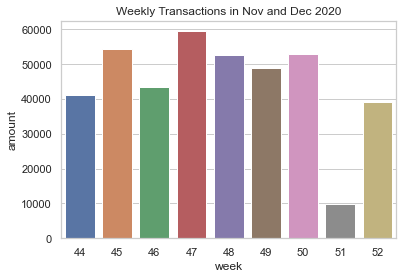

In [5]:
sns.barplot(x="week", y="amount", data=wk_set_2k_df).set_title('Weekly Transactions in Nov and Dec 2020')

Text(0.5, 1.0, 'Weekly Transactions in Jan and Feb 2001')

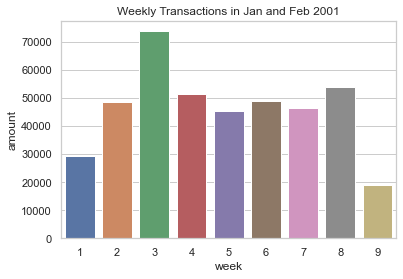

In [6]:
sns.barplot(x="week", y="amount", data=wk_set_2k1_df).set_title('Weekly Transactions in Jan and Feb 2001')

2. Transactions per region

Text(0.5, 1.0, 'transactions by region')

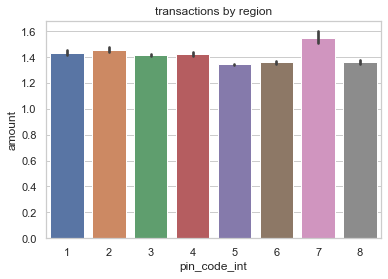

In [7]:
sns.barplot(x="pin_code_int", y="amount", data=cust_data_subset).set_title('transactions by region')

3. purchase routines based on age groups

In [8]:
def row_percent(df,col):
    col_sum=df[col].sum()
    return df[col]/col_sum


In [9]:
age_grps=pd.DataFrame(cust_data_subset.age_int.value_counts()).reset_index()
age_grps.columns=['Age_Class','Counts']

age_grps['Age_Class']=age_grps['Age_Class'].map(inv_age_dict_int)
age_grps['Age_Class']=age_grps['Age_Class'].map(age_dict_class)
age_grps['Percent']=row_percent(age_grps,'Counts')
age_grps

,Age_Class,Counts,Percent
0,35-39,181213,0.222
1,40-44,151023,0.185
2,30-34,140805,0.172
3,45-49,99719,0.122
4,25-29,66432,0.081
5,50-54,53719,0.066
6,<25,30070,0.037
7,+65,27353,0.033
8,55-59,24743,0.030
9,NA,22362,0.027


Text(0.5, 1.0, 'Age groups for Customers')

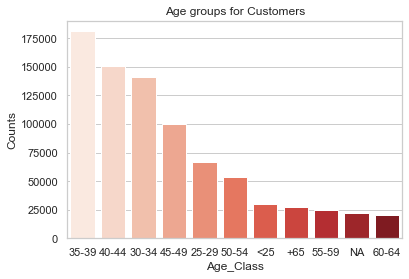

In [10]:
sns.barplot(x="Age_Class", y="Counts", data=age_grps, palette='Reds').set_title('Age groups for Customers')

the frequent shoppers belong to age group 35-39 and 40-44 followed by 30-34.

4. large purchase orders

This is a plot showing the number of purchases been mase by customers. Since the data is organized by transaction date we can see that certain dates/days received dramatically more purchases than other days. i am more interested in holiday seasons of 2000 and 2001 we should expect to see increases in purchase activity.

In [11]:
def boxPlot(variable):
    sns.boxplot(x=variable)
    return plt.show(),plt.clf()

In [12]:
def CDFPlot(variable):
    lower,upper=variable.min(),variable.max()
    mu,sigma = variable.mean(),variable.std()
    values = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
    sns.kdeplot(variable,cumulative=True,label=variable.name+" CDF",color='b')
    sns.kdeplot(values.rvs(1000),cumulative=True,label="Gaussian CDF",color='r')
    plt.suptitle("Cumulative Distribution Frequency of purchase amount Against Normal Gaussian distribution.")
    plt.figure()
    return plt.show(),plt.clf()

In [13]:
def Large_Purchase_Order(x):
    if x>99: # Arbitrary threshold of 100
        x=1
    else:
        x=0
    return x

In [14]:
cust_data['Large_Order']=cust_data.amount.apply(Large_Purchase_Order)

In [15]:
print('Number of Large Orders',len(cust_data[cust_data['Large_Order']==1]))
cust_data[cust_data['Large_Order']==1].head()

Number of Large Orders 23


,transaction_dt,customer_id,product_subclass,product_id,amount,asset,sales_price,age_label,age_int,pin_code_int,age_group_A,age_group_B,age_group_C,age_group_D,age_group_E,age_group_F,age_group_G,age_group_H,age_group_I,age_group_J,age_group_K,pin_code_A,pin_code_B,pin_code_C,pin_code_D,pin_code_E,pin_code_F,pin_code_G,pin_code_H,Large_Order
224250,2001-01-03,01062489,560402,4710628119010,111,43290,45554,25-29,2,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
363947,2000-11-25,01515749,100504,4710085104116,200,16200,16920,35-39,4,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
363948,2000-11-26,01515749,500201,4710114128038,150,22500,21870,35-39,4,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
373505,2000-11-26,01533705,500201,4710114128038,150,22500,21870,25-29,2,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
389531,2000-11-27,01558418,560402,4710628131012,127,49403,49172,35-39,4,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


Text(0.5, 0, 'location in rows of dataset')

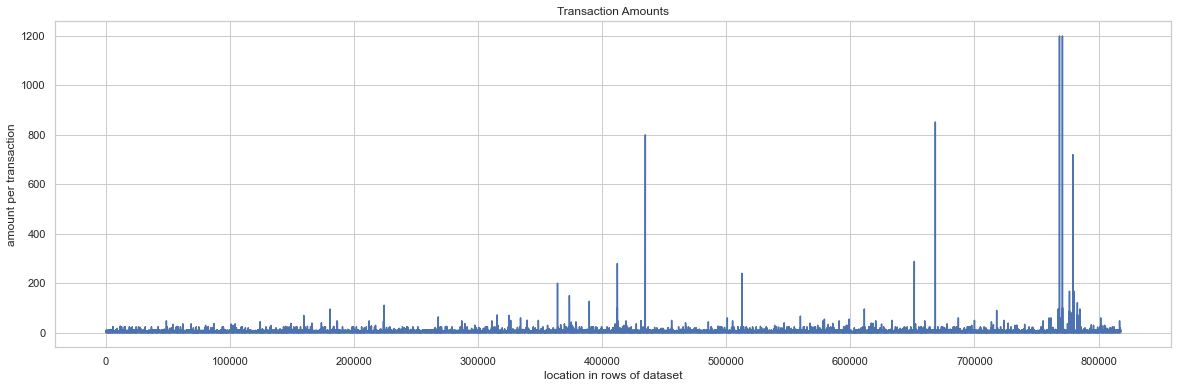

In [16]:
fig, axs = plt.subplots(figsize = (20,6))
plt.plot(cust_data.amount)
plt.title('Transaction Amounts')
plt.ylabel('amount per transaction')
plt.xlabel('location in rows of dataset')

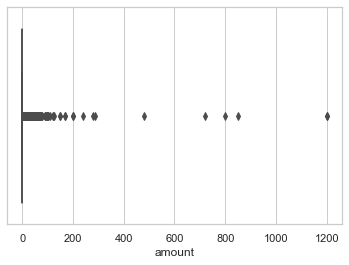

(None, None)

<Figure size 432x288 with 0 Axes>

In [17]:
boxPlot(cust_data_subset['amount'])

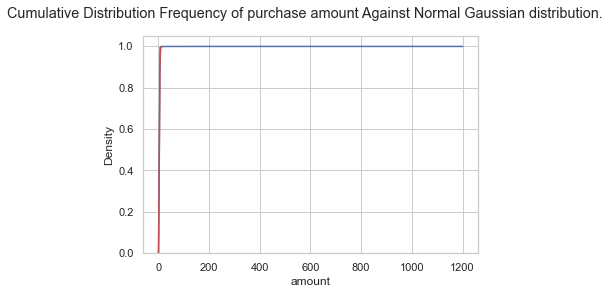

<Figure size 432x288 with 0 Axes>

(None, None)

<Figure size 432x288 with 0 Axes>

In [18]:
CDFPlot(cust_data_subset['amount'])

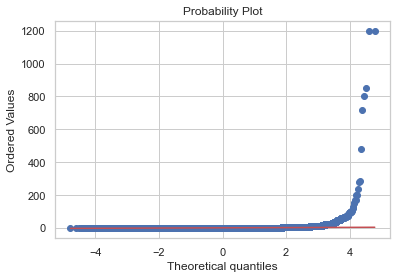

In [19]:
stats.probplot(cust_data_subset['amount'], dist="norm", plot=pylab)
pylab.show()

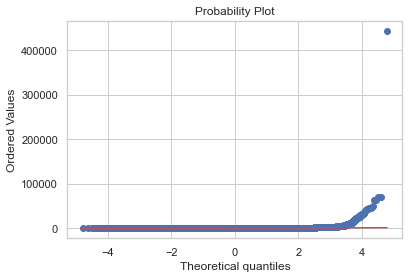

In [20]:
stats.probplot(cust_data_subset['sales_price'], dist="norm", plot=pylab)
pylab.show()

In [21]:
from scipy import stats
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
norm=stats.normaltest(cust_data_subset.sales_price)
print('test statistic: ',norm[0])
if(norm[1] < 0.055):
    print("P-value: ",norm[1],"\nConclusion: Not a normal distribution.")
else:
    print("P-value: ",norm[1],"\nConclusion: A normal distribution.")

test statistic:  4963437.687618293
P-value:  0.0 
Conclusion: Not a normal distribution.


In [22]:
from scipy import stats
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
norm=stats.normaltest(cust_data_subset.amount)
print('test statistic: ',norm[0])
if(norm[1] < 0.055):
    print("P-value: ",norm[1],"\nConclusion: Not a normal distribution.")
else:
    print("P-value: ",norm[1],"\nConclusion: A normal distribution.")

test statistic:  4310127.30717614
P-value:  0.0 
Conclusion: Not a normal distribution.


For sales prices and amount we can see that they range from 1 to 444000 (not in dollars.. currency is unkown) and furthermore are clearly NOT normally distributed and contain many, many outliers. Its pretty clear that sales price and amount are not a trusted metrics to consider.

In [23]:
cust_data_subset.amount.describe()

count    817741.000
mean          1.382
std           2.897
min           1.000
25%           1.000
50%           1.000
75%           1.000
max        1200.000
Name: amount, dtype: float64

In [24]:
cust_data_subset.sales_price.describe()

count    817741.000
mean        131.876
std         631.058
min           1.000
25%          42.000
50%          76.000
75%         132.000
max      444000.000
Name: sales_price, dtype: float64

After doing statistical tests of both 'sales_price' and 'amount' we find that they are not normally distributed; which also means that I cannot run a pearson-r correlation test to check for associations.

# Outliers identification

In [25]:
Observed_Column=cust_data_subset.sales_price
quartile_1=np.percentile(Observed_Column, 25)
quartile_3=np.percentile(Observed_Column, 75)
inter_quartile_range=quartile_3-quartile_1
Inner_fence=1.5*(inter_quartile_range)
Outer_fence=3*inter_quartile_range
#Fences for viewing outliers
#mild outliers
inner_lower_fence=quartile_1-Inner_fence
inner_upper_fence=quartile_3+Inner_fence
#strong outliers
outer_lower_fence=quartile_1-Outer_fence
outer_upper_fence=quartile_3+Outer_fence

In [26]:
print('Median:',cust_data_subset.amount.median())
print('Outer Fence:',outer_lower_fence,'&',outer_upper_fence)
outliers_df=(cust_data_subset['sales_price']<outer_lower_fence) | (cust_data_subset['sales_price']>outer_upper_fence)
print('Number of Strong Outliers:',len(cust_data_subset[outliers_df]))
cust_data_subset[outliers_df].head()

Median: 1.0
Outer Fence: -228.0 & 402.0
Number of Strong Outliers: 34788


,transaction_dt,customer_id,age_int,product_subclass,product_id,pin_code_int,asset,amount,sales_price,year,month,week,day,unit_price
608898,2000-11-01,01848564,11,320402,20546601,8,905,1,1129,2000,11,44,1,1129.000
608897,2000-11-01,01848564,11,320501,20564131,8,329,1,410,2000,11,44,1,410.000
608896,2000-11-01,01848564,11,320402,20564100,8,946,1,1180,2000,11,44,1,1180.000
212091,2000-11-01,01004373,5,110411,4710199011775,5,372,12,434,2000,11,44,1,36.167
212093,2000-11-01,01004373,5,110401,4710008290056,5,460,10,540,2000,11,44,1,54.000


In [27]:
print('Median:',cust_data_subset.amount.median())
print('Inner Fence:',inner_lower_fence,'&',inner_upper_fence)
outliers_df=(cust_data_subset['sales_price']<inner_lower_fence) | (cust_data_subset['sales_price']>inner_upper_fence)
print('Number of Mild Outliers:',len(cust_data_subset[outliers_df]))
cust_data_subset[outliers_df].head()

Median: 1.0
Inner Fence: -93.0 & 267.0
Number of Mild Outliers: 69184


,transaction_dt,customer_id,age_int,product_subclass,product_id,pin_code_int,asset,amount,sales_price,year,month,week,day,unit_price
43018,2000-11-01,00166324,9,100514,4710626521716,5,276,2,310,2000,11,44,1,155.0
43020,2000-11-01,00166324,9,110217,4719090900058,5,290,2,298,2000,11,44,1,149.0
43029,2000-11-01,00166324,9,100505,4710594124001,5,266,1,300,2000,11,44,1,300.0
400793,2000-11-01,01576146,5,110217,4710265849066,5,360,2,270,2000,11,44,1,135.0
165041,2000-11-01,00841771,5,110507,723125488095,5,210,2,270,2000,11,44,1,135.0


# Recency, Frequency, Monetary (RFM) Segmentation

1. Recency (R)
    - How many days since customer's last purchase
    - the lower the better
2. Frequency (F)
    - How many purchases the customer has done 
3. Monetary Value (M)
    - Measures how much the customer has spent 
RFM variables are useful for beginning to classify users based on their behavior over time.

In [28]:
#setting day units from last day of dataset by adding a day to the transaction_dt
snapshot_date=max(rmf_cust_data_subset.transaction_dt)+dt.timedelta(days=1)

#Aggregate data on a customer level 
rmf_df=rmf_cust_data_subset.groupby(['customer_id']).agg({
    'transaction_dt': lambda x: (snapshot_date-x.max()).days,'product_id':'count','total_sum':'sum'})

#Rename columns for easier interpretation
rmf_df.rename(columns={'transaction_dt':'Recency',
                         'product_id':'Frequency','total_sum':'Monetary'},inplace=True)

rmf_df.sort_values(by='Monetary',ascending=False).head(15)

,Recency,Frequency,Monetary
customer_id,,,
01622362,12,65,459771.0
01558418,13,141,203498.0
02131269,80,10,197191.0
02119083,6,59,183002.0
00020459,1,1246,160961.0
02112589,1,879,152279.0
02138107,31,24,145572.0
01851588,3,33,138104.0
00842419,2,133,120146.0


* Observation: Here we can see the Recency, Frequency, and Monetary values have been created and I have sorted the values descending by the Monetary column. The above dataset makes it clear to understand the valuable customers of an organization.

* For example: We can see customer 02112589 has bought a merchandisea day ago, often buys a product 879 and has spent significantly large amount of 152279.0 when compared to the other customers.



In [29]:
r_labels=range(10,0,-1) #<reversed lower recency is better
#higher labels higher values
f_labels=range(1,5)
m_labels=range(1,5)

r_quartiles=pd.qcut(rmf_df['Recency'],10,labels=r_labels)
f_quartiles=pd.qcut(rmf_df['Frequency'],4,labels=f_labels)
m_quartiles=pd.qcut(rmf_df['Monetary'],4,labels=f_labels)

rmf_df=rmf_df.assign(R=r_quartiles.values)
rmf_df=rmf_df.assign(F=f_quartiles.values)
rmf_df=rmf_df.assign(M=m_quartiles.values)
rmf_df.head()

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
00001069,19,11,1944.0,6,2,3
00001113,54,18,2230.0,3,3,3
00001250,19,14,1583.0,6,2,2
00001359,87,3,364.0,2,1,1
00001823,36,14,2607.0,5,2,3


In [30]:
rmf_df['RFM_Score']=rmf_df[['R','F','M']].sum(axis=1)#Sum across columns
rmf_df.sort_values(by='Monetary',ascending=False).head(15)

,Recency,Frequency,Monetary,R,F,M,RFM_Score
customer_id,,,,,,,
01622362,12,65,459771.0,7,4,4,15
01558418,13,141,203498.0,7,4,4,15
02131269,80,10,197191.0,2,2,4,8
02119083,6,59,183002.0,9,4,4,17
00020459,1,1246,160961.0,10,4,4,18
02112589,1,879,152279.0,10,4,4,18
02138107,31,24,145572.0,5,3,4,12
01851588,3,33,138104.0,10,4,4,18
00842419,2,133,120146.0,10,4,4,18


In [31]:
def RFM_Segmentation(df):
    if df['RFM_Score']>=10:
        return 'First segment customers'
    elif (df['RFM_Score']>=5) and (df['RFM_Score']<10):
        return 'Second segment customers'
    else:
        return 'Third segment customers'

In [32]:
rmf_df['RMF_Segment']=rmf_df.apply(RFM_Segmentation,axis=1)

In [33]:
rmf_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RMF_Segment
customer_id,,,,,,,,
00001069,19,11,1944.0,6,2,3,11,First segment customers
00001113,54,18,2230.0,3,3,3,9,Second segment customers
00001250,19,14,1583.0,6,2,2,10,First segment customers
00001359,87,3,364.0,2,1,1,4,Third segment customers
00001823,36,14,2607.0,5,2,3,10,First segment customers
00002189,57,62,14056.0,3,4,4,11,First segment customers
00003667,21,13,11509.0,6,2,4,12,First segment customers
00004282,47,9,967.0,4,2,2,8,Second segment customers
00004381,103,11,701.0,1,2,1,4,Third segment customers


In [34]:
display(rmf_df.groupby('RMF_Segment').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(1))

Recency Frequency Monetary       
                           mean     mean     mean   count 
RMF_Segment                                               
First segment customers    15.7     37.4    4906.3   18796
Second segment customers   59.9      9.8    1364.5   10647
Third segment customers    97.6      3.6     387.6    2823